In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pyreadstat
import pickle
import seaborn as sns
from itertools import groupby

In [141]:
__PATH_to_FILE__ = "YOUR PATH HERE"
os.chdir(__PATH_to_FILE__)

In [142]:
df = pd.read_csv("full_ds.csv")
df = df[df.SurveyYear > 2014]

In [145]:
df = df.drop(["JTTXSC", "TripDisIncSW_B01ID", "BusStandard_B01ID", "HHIncOrig_B01ID", "HHoldCountry_B01ID", "HouseholdID", "HHIncome2002_B02ID", "IndividualID", "SurveyYear", 'DayID', "WalkRailAlt_B01ID", "StationKmTRACC",
                       "TripTravTime"], axis = 1)

Text(0.5, 1.0, 'Trip mode')

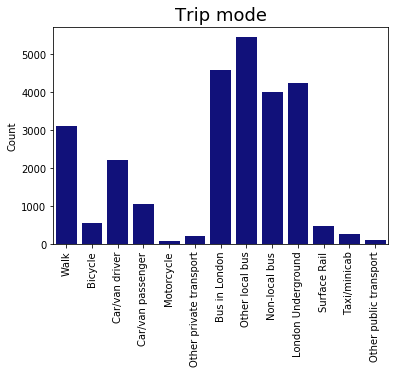

In [169]:
dict_dum_val = {1: "Walk", 2: "Bicycle", 3: "Car/van driver", 4: "Car/van passenger", 5: "Motorcycle", 6: "Other private transport", 7: "Bus in London",
8: "Other local bus", 9: "Non-local bus", 10: "London Underground", 11: "Surface Rail", 12: "Taxi/minicab", 13: "Other public transport"}
p = sns.countplot(df['MainMode_B04ID'], color='darkblue')
plot_labels = dict_dum_val.values()
p.set_xticklabels(plot_labels, rotation=90)
p.set(ylabel='Count', xlabel = '')
p.axes.set_title("Trip mode", fontsize=18,color="black")


In [148]:
mode_tr = df['MainMode_B04ID'].tolist()
mode_of_tr = [(np.random.randint(7, 11), i) for i in range(22000)]
new_main_mode = [mode_of_tr[i][0] if mode_tr[i] in [3,4] else mode_tr[i] for i in range(22000)]
new_main_mode.extend(mode_tr[22000:])
df['MainMode_B04ID'] = new_main_mode

In [80]:
dummies = ['MainMode_B04ID', 'TripPurpose_B04ID', "TravDay", 'TripPurpFrom_B01ID', 'TripPurpTo_B01ID', 
           'TripStart_B01ID', 'TWSWeek', 'HRPWorkStat_B02ID', 'HRPSEGWorkStat_B01ID', 'Age_B04ID',
           'OfPenAge_B01ID', 'Sex_B01ID', 'CarAccess_B02ID']

In [152]:
non_dummies = [i for i in df.columns if i not in dummies]   # 'TripTravTime' is target

In [154]:
df_init = df

In [156]:
dummies_df = pd.get_dummies(df["MainMode_B04ID"], drop_first=True, prefix="MainMode_B04ID")
for i in dummies[1:]:
    dummies_new = pd.get_dummies(df[i], drop_first=True, prefix=i)
    dummies_df = pd.concat([dummies_df, dummies_new], axis=1)

In [87]:
target_variable = df.TripTotalTime

In [161]:
numeric_df = df_init[["TripTotalTime", 'JD', 'HHoldNumAdults', 'HHoldNumChildren', 'NumVehicles']]

In [159]:
all_var_df = pd.concat([numeric_df, dummies_df], axis=1)

In [93]:
all_var_df.to_csv("trip_travel_2015_modified.csv", index=False)